**Predicting which customers will purchase a quoted insurance plan**

**1. Reading the data from the given CSV files that is stored in Google Drive.**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive




---



**2. Load train data from csv file.**

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from datetime import datetime

dataPath = '/gdrive/MyDrive/PGD Assignment Notebooks/train.csv'
df = pd.read_csv(dataPath)
print("Total no. of records in train dataset is: {0}".format(df['QuoteNumber'].count()))
df.rename(columns={'GeographicField64' : 'State', 'Field7' : 'BMI', 'Field12' : 'IS_Smoker'}, inplace = True)

df

Total no. of records in train dataset is: 260753


,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,BMI,Field8,Field9,Field10,Field11,IS_Smoker,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,...,GeographicField44A,GeographicField44B,GeographicField45A,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField47B,GeographicField48A,GeographicField48B,GeographicField49A,GeographicField49B,GeographicField50A,GeographicField50B,GeographicField51A,GeographicField51B,GeographicField52A,GeographicField52B,GeographicField53A,GeographicField53B,GeographicField54A,GeographicField54B,GeographicField55A,GeographicField55B,GeographicField56A,GeographicField56B,GeographicField57A,GeographicField57B,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,State
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,17,23,17,23,15,22,16,22,13,22,13,23,T,D,2,1,7,18,3,8,0,5,5,24,V,48649,0,0,0,0,...,8,4,20,22,10,8,6,5,15,13,19,18,16,14,21,23,21,23,16,11,22,24,7,14,-1,17,15,17,14,18,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,6,8,6,8,5,7,5,8,13,22,13,23,T,E,5,9,5,14,6,18,1,5,5,11,P,26778,0,0,1,1,...,23,24,11,15,21,24,6,11,21,21,18,15,20,20,13,12,12,12,15,9,13,11,11,20,-1,9,18,21,8,7,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,7,12,7,12,6,10,7,11,25,25,13,23,T,J,4,6,3,10,4,11,1,5,5,11,K,8751,0,0,2,2,...,21,22,24,25,20,22,7,13,23,23,20,19,20,20,18,20,19,21,20,19,11,8,3,3,-1,5,21,24,12,15,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,3,2,3,2,2,2,3,2,13,22,13,23,Y,F,15,23,8,19,14,24,0,5,5,23,V,43854,0,0,0,0,...,3,1,14,22,6,2,7,14,11,8,19,18,18,16,13,12,13,12,17,13,5,2,3,4,-1,7,14,14,14,18,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,8,13,8,13,7,11,7,13,13,22,13,23,T,F,4,6,3,6,3,6,1,5,5,7,R,12505,1,0,0,0,...,24,25,9,11,25,25,5,3,22,22,21,21,17,15,25,25,25,25,17,13,13,11,3,4,-1,7,11,9,10,10,18,22,-1,10,-1,11,-1,12,N,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260748,434584,2013-05-16,0,J,23,0.9691,0.0004,"1,165",1.2665,N,9,15,9,15,8,13,8,15,13,22,13,23,T,G,3,5,9,21,8,20,1,5,5,1,Q,64461,0,0,0,0,...,11,11,9,11,14,16,13,20,16,14,20,20,20,20,10,9,11,10,23,24,15,16,4,6,-1,10,5,2,8,7,7,6,-1,22,-1,20,-1,8,N,TX
260749,434585,2014-12-07,0,J,26,0.8870,0.0004,"1,113",1.2665,N,15,22,15,22,13,20,14,21,25,25,25,25,X,G,13,22,20,25,11,23,1,5,4,11,T,4899,0,1,1,1,...,8,5,11,18,15,17,8,16,21,21,22,23,23,23,10,7,11,9,25,25,14,14,1,1,-1,3,22,24,10,11,5,4,25,25,-1,2,-1,20,N,TX
260750,434586,2014-02-18,0,F,11,0.9685,0.0040,548,1.1886,N,6,9,6,9,5,7,6,8,13,22,13,23,T,E,5,8,2,1,2,3,1,5,5,11,P,61325,0,0,0,0,...,25,25,10,13,21,22,6,7,18,17,15,10,15,11,16,17,15,16,14,9,14,13,7,14,-1,2,9,5,8,8,16,20,-1,10,-1,9,-1,8,N,NJ
260751,434587,2014-04-08,0,F,7,1.0006,0.0040,548,1.2433,N,16,23,16,23,21,24,15,22,13,22,1,6,Y,E,4,8,6,17,3,7,0,1,2,20,K,55688,0,0,0,0,...,13,13,10,14,14,16,6,8,22,23,21,21,22,23,20,22,21,23,22,22,11,9,3,4,-1,3,15,17,8,7,10,11,-1,23,-1,10,-1,16,N,NJ




---



**3. Rename the features for easy to understand.**

In [164]:
df.rename(columns={'GeographicField64' : 'State', 'Field7' : 'BMI', 'Field12' : 'Is_Smoker'}, inplace = True)

df

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,BMI,Field8,Field9,Field10,Field11,IS_Smoker,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,...,GeographicField44A,GeographicField44B,GeographicField45A,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField47B,GeographicField48A,GeographicField48B,GeographicField49A,GeographicField49B,GeographicField50A,GeographicField50B,GeographicField51A,GeographicField51B,GeographicField52A,GeographicField52B,GeographicField53A,GeographicField53B,GeographicField54A,GeographicField54B,GeographicField55A,GeographicField55B,GeographicField56A,GeographicField56B,GeographicField57A,GeographicField57B,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,State
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,17,23,17,23,15,22,16,22,13,22,13,23,T,D,2,1,7,18,3,8,0,5,5,24,V,48649,0,0,0,0,...,8,4,20,22,10,8,6,5,15,13,19,18,16,14,21,23,21,23,16,11,22,24,7,14,-1,17,15,17,14,18,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,6,8,6,8,5,7,5,8,13,22,13,23,T,E,5,9,5,14,6,18,1,5,5,11,P,26778,0,0,1,1,...,23,24,11,15,21,24,6,11,21,21,18,15,20,20,13,12,12,12,15,9,13,11,11,20,-1,9,18,21,8,7,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,7,12,7,12,6,10,7,11,25,25,13,23,T,J,4,6,3,10,4,11,1,5,5,11,K,8751,0,0,2,2,...,21,22,24,25,20,22,7,13,23,23,20,19,20,20,18,20,19,21,20,19,11,8,3,3,-1,5,21,24,12,15,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,3,2,3,2,2,2,3,2,13,22,13,23,Y,F,15,23,8,19,14,24,0,5,5,23,V,43854,0,0,0,0,...,3,1,14,22,6,2,7,14,11,8,19,18,18,16,13,12,13,12,17,13,5,2,3,4,-1,7,14,14,14,18,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,8,13,8,13,7,11,7,13,13,22,13,23,T,F,4,6,3,6,3,6,1,5,5,7,R,12505,1,0,0,0,...,24,25,9,11,25,25,5,3,22,22,21,21,17,15,25,25,25,25,17,13,13,11,3,4,-1,7,11,9,10,10,18,22,-1,10,-1,11,-1,12,N,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260748,434584,2013-05-16,0,J,23,0.9691,0.0004,"1,165",1.2665,N,9,15,9,15,8,13,8,15,13,22,13,23,T,G,3,5,9,21,8,20,1,5,5,1,Q,64461,0,0,0,0,...,11,11,9,11,14,16,13,20,16,14,20,20,20,20,10,9,11,10,23,24,15,16,4,6,-1,10,5,2,8,7,7,6,-1,22,-1,20,-1,8,N,TX
260749,434585,2014-12-07,0,J,26,0.8870,0.0004,"1,113",1.2665,N,15,22,15,22,13,20,14,21,25,25,25,25,X,G,13,22,20,25,11,23,1,5,4,11,T,4899,0,1,1,1,...,8,5,11,18,15,17,8,16,21,21,22,23,23,23,10,7,11,9,25,25,14,14,1,1,-1,3,22,24,10,11,5,4,25,25,-1,2,-1,20,N,TX
260750,434586,2014-02-18,0,F,11,0.9685,0.0040,548,1.1886,N,6,9,6,9,5,7,6,8,13,22,13,23,T,E,5,8,2,1,2,3,1,5,5,11,P,61325,0,0,0,0,...,25,25,10,13,21,22,6,7,18,17,15,10,15,11,16,17,15,16,14,9,14,13,7,14,-1,2,9,5,8,8,16,20,-1,10,-1,9,-1,8,N,NJ
260751,434587,2014-04-08,0,F,7,1.0006,0.0040,548,1.2433,N,16,23,16,23,21,24,15,22,13,22,1,6,Y,E,4,8,6,17,3,7,0,1,2,20,K,55688,0,0,0,0,...,13,13,10,14,14,16,6,8,22,23,21,21,22,23,20,22,21,23,22,22,11,9,3,4,-1,3,15,17,8,7,10,11,-1,23,-1,10,-1,16,N,NJ




---



**4. Drop the features which are not necessary or doesn't give importance to the model, i.e., get the fields in the original DataFrame where any field which has only one value in the whole dataset and drop those fields as it is not needed or not useful feature in prediction.**

In [165]:
#Get the unique values for each Field in the DataFrame and converting to String to give header to the output for easy of querying the dataset in DataFrame.
df_str = df.nunique().to_frame().to_string()

#Give names to the output data
df_new = pd.read_csv(StringIO(df_str), sep='\s+', names = ['Field', 'Unique_Count'])

#Will ignore the unwanted field with field value '0' from the new DataFrame
df_final = df_new.loc[1:]

#List the unique fields having a single value in the entire train dataset
df_final['Unique_Count'].astype(int)

#Finally drop the fields from the train dataset
fieldsToDrop = df_final[df_final['Unique_Count'] == 1]['Field'].values;
print("Features that are being dropped from the train dataset are: \n{0}".format(fieldsToDrop))

Features that are being dropped from the train dataset are: 
['PropertyField6' 'GeographicField10A']




---



**5. The Categorical features are as follows.**

In [166]:
cols = df.columns
num_cols = df._get_numeric_data().columns

categorical_features = sorted(list(set(cols) - set(num_cols)))

df[categorical_features]

,CoverageField8,CoverageField9,Field10,Field6,GeographicField63,IS_Smoker,Original_Quote_Date,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PersonalField7,PropertyField14,PropertyField28,PropertyField3,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField36,PropertyField37,PropertyField38,PropertyField4,PropertyField5,PropertyField7,SalesField7,State
0,T,D,965,B,N,N,2013-08-16,ZA,ZE,XR,XD,N,C,B,N,N,N,Y,G,Y,N,N,N,N,Y,O,V,CA
1,T,E,548,F,N,N,2014-04-22,XB,YJ,YE,XT,N,B,B,N,N,O,N,H,Y,N,N,N,N,Y,N,P,NJ
2,T,J,548,F,N,N,2014-08-25,ZH,XS,YP,XC,N,C,B,Y,N,K,Y,H,Y,N,N,N,Y,Y,R,K,NJ
3,Y,F,"1,165",J,N,N,2013-04-15,XO,XE,YI,XX,N,C,B,N,N,O,Y,G,N,N,Y,N,N,Y,R,V,TX
4,T,F,"1,487",E,N,N,2014-01-25,ZA,ZE,XR,XD,N,A,B,Y,N,O,N,H,N,N,N,N,Y,Y,D,R,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260748,T,G,"1,165",J,N,N,2013-05-16,ZA,ZE,XR,XD,N,C,B,N,N,N,N,G,N,N,N,N,N,Y,R,Q,TX
260749,X,G,"1,113",J,N,N,2014-12-07,ZH,ZH,XQ,ZQ,N,C,B,N,N,K,Y,E,N,N,Y,N,N,Y,J,T,TX
260750,T,E,548,F,N,N,2014-02-18,XR,ZQ,ZW,XC,N,A,A,N,N,O,Y,G,Y,N,Y,N,N,Y,R,P,NJ
260751,Y,E,548,F,N,N,2014-04-08,YF,YY,XI,XC,N,C,B,Y,N,K,Y,E,N,N,N,N,Y,Y,R,K,NJ




---



**6. The Numerical features are as follows.**

In [167]:
numerical_features = sorted(list(set(cols)-set(categorical_features)))
df[numerical_features]

,BMI,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,Field11,Field8,Field9,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField1A,GeographicField1B,...,PropertyField1A,PropertyField1B,PropertyField20,PropertyField21A,PropertyField21B,PropertyField22,PropertyField23,PropertyField24A,PropertyField24B,PropertyField25,PropertyField26A,PropertyField26B,PropertyField27,PropertyField29,PropertyField2A,PropertyField2B,PropertyField35,PropertyField39A,PropertyField39B,PropertyField6,PropertyField8,PropertyField9,QuoteConversion_Flag,QuoteNumber,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField8,SalesField9
0,23,2,1,17,23,17,23,15,22,16,22,13,22,13,23,1.0200,0.9403,0.0006,-1,25,1,1,1,1,1,1,-1,7,1,2,1,2,13,22,-1,12,3,6,3,6,...,5,7,0,17,23,2,4,15,21,3.0,5,5,6,0.0,-1,19,2,7,5,0,0,0,0,1,0,0,0,0,0,0,7,18,3,8,0,5,5,24,48649,0
1,7,5,9,6,8,6,8,5,7,5,8,13,22,13,23,1.2433,1.0006,0.0040,-1,25,4,15,8,13,5,14,-1,13,9,11,5,12,2,16,-1,22,23,24,8,17,...,17,21,0,6,8,2,1,6,8,2.0,4,3,3,NaN,-1,22,2,11,12,0,0,0,0,2,0,1,1,0,0,0,5,14,6,18,1,5,5,11,26778,0
2,7,4,6,7,12,7,12,6,10,7,11,25,25,13,23,1.2433,1.0006,0.0040,-1,25,4,11,9,15,5,12,-1,12,10,16,6,14,2,13,-1,17,21,21,2,4,...,12,16,0,7,12,2,1,15,21,1.5,14,20,3,NaN,-1,13,2,23,24,0,1,0,0,4,0,2,2,0,0,0,3,10,4,11,1,5,5,11,8751,0
3,10,15,23,3,2,3,2,2,2,3,2,13,22,13,23,1.2665,0.9769,0.0004,-1,25,15,22,21,22,15,22,-1,15,24,23,9,18,2,3,-1,6,10,13,2,3,...,1,1,0,3,2,2,1,7,9,1.0,13,18,10,NaN,-1,2,2,24,25,0,1,0,0,6,0,0,0,0,0,0,8,19,14,24,0,5,5,23,43854,0
4,23,4,6,8,13,8,13,7,11,7,13,13,22,13,23,1.3045,0.9472,0.0006,-1,25,9,17,12,16,9,17,-1,22,9,8,10,20,2,6,-1,4,17,16,2,2,...,10,13,0,8,13,2,1,13,19,3.0,4,4,4,0.0,-1,19,0,18,22,0,0,0,0,8,0,0,0,0,0,0,3,6,3,6,1,5,5,7,12505,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260748,23,3,5,9,15,9,15,8,13,8,15,13,22,13,23,1.2665,0.9691,0.0004,-1,25,24,23,24,24,24,23,-1,25,24,25,25,25,2,2,-1,16,11,14,10,19,...,6,8,0,9,15,2,1,15,21,3.0,5,6,4,0.0,-1,4,0,18,22,0,0,0,0,434584,0,0,0,0,0,0,9,21,8,20,1,5,5,1,64461,0
260749,26,13,22,15,22,15,22,13,20,14,21,25,25,25,25,1.2665,0.8870,0.0004,-1,25,14,20,22,22,14,20,-1,16,23,20,8,18,2,6,-1,19,9,11,9,18,...,6,8,0,15,22,2,1,14,20,2.0,10,13,3,NaN,-1,22,2,8,8,0,1,0,0,434585,1,1,1,0,0,0,20,25,11,23,1,5,4,11,4899,0
260750,11,5,8,6,9,6,9,5,7,6,8,13,22,13,23,1.1886,0.9685,0.0040,-1,25,4,16,8,10,5,16,-1,14,9,8,5,13,2,12,-1,19,23,24,3,7,...,7,10,0,6,9,2,1,4,4,3.0,1,1,14,NaN,-1,23,2,6,5,0,1,0,0,434586,0,0,0,0,0,0,2,1,2,3,1,5,5,11,61325,0
260751,7,4,8,16,23,16,23,21,24,15,22,13,22,1,6,1.2433,1.0006,0.0040,-1,25,4,15,9,14,5,15,-1,15,10,14,6,15,2,13,-1,5,22,22,2,4,...,5,7,0,14,21,2,1,21,24,2.0,14,19,4,NaN,-1,20,2,15,18,0,1,0,0,434587,0,0,0,0,0,0,6,17,3,7,0,1,2,20,55688,0




---



**7. Let's split the "Original_Quote_Date" feature into Year, Month and Is_Weekend to add more features to the existing train dataset.**

In [117]:
str_date = df['Original_Quote_Date']
year_lst=[]
month_lst=[]
weekend_lst=[]
date_lst=[]

for i in str_date:
  year_lst.append(int(i[0:4]))
  month_lst.append(int(i[5:7]))
  date_lst.append(int(i[8:]))
  d = datetime(int(i[0:4]), int(i[5:7]), int(i[8:]))
  if d.weekday() > 4:
    weekend_lst.append(1)
  else:
    weekend_lst.append(0)

df['Year'] = year_lst
df['Month'] = month_lst
df['Is_Weekend'] = weekend_lst

df

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,BMI,Field8,Field9,Field10,Field11,IS_Smoker,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,...,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField47B,GeographicField48A,GeographicField48B,GeographicField49A,GeographicField49B,GeographicField50A,GeographicField50B,GeographicField51A,GeographicField51B,GeographicField52A,GeographicField52B,GeographicField53A,GeographicField53B,GeographicField54A,GeographicField54B,GeographicField55A,GeographicField55B,GeographicField56A,GeographicField56B,GeographicField57A,GeographicField57B,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,State,Year,Month,Is_Weekend
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,0,17,23,17,23,15,22,16,22,13,22,13,23,T,D,2,1,7,18,3,8,0,5,5,24,V,48649,0,0,0,0,...,22,10,8,6,5,15,13,19,18,16,14,21,23,21,23,16,11,22,24,7,14,-1,17,15,17,14,18,9,9,-1,8,-1,18,-1,10,N,CA,2013,8,0
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,0,6,8,6,8,5,7,5,8,13,22,13,23,T,E,5,9,5,14,6,18,1,5,5,11,P,26778,0,0,1,1,...,15,21,24,6,11,21,21,18,15,20,20,13,12,12,12,15,9,13,11,11,20,-1,9,18,21,8,7,10,10,-1,11,-1,17,-1,20,N,NJ,2014,4,0
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,0,7,12,7,12,6,10,7,11,25,25,13,23,T,J,4,6,3,10,4,11,1,5,5,11,K,8751,0,0,2,2,...,25,20,22,7,13,23,23,20,19,20,20,18,20,19,21,20,19,11,8,3,3,-1,5,21,24,12,15,15,18,-1,21,-1,11,-1,8,N,NJ,2014,8,0
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,0,3,2,3,2,2,2,3,2,13,22,13,23,Y,F,15,23,8,19,14,24,0,5,5,23,V,43854,0,0,0,0,...,22,6,2,7,14,11,8,19,18,18,16,13,12,13,12,17,13,5,2,3,4,-1,7,14,14,14,18,6,5,-1,10,-1,9,-1,21,N,TX,2013,4,0
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,0,8,13,8,13,7,11,7,13,13,22,13,23,T,F,4,6,3,6,3,6,1,5,5,7,R,12505,1,0,0,0,...,11,25,25,5,3,22,22,21,21,17,15,25,25,25,25,17,13,13,11,3,4,-1,7,11,9,10,10,18,22,-1,10,-1,11,-1,12,N,IL,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260748,434584,2013-05-16,0,J,23,0.9691,0.0004,"1,165",1.2665,0,9,15,9,15,8,13,8,15,13,22,13,23,T,G,3,5,9,21,8,20,1,5,5,1,Q,64461,0,0,0,0,...,11,14,16,13,20,16,14,20,20,20,20,10,9,11,10,23,24,15,16,4,6,-1,10,5,2,8,7,7,6,-1,22,-1,20,-1,8,N,TX,2013,5,0
260749,434585,2014-12-07,0,J,26,0.8870,0.0004,"1,113",1.2665,0,15,22,15,22,13,20,14,21,25,25,25,25,X,G,13,22,20,25,11,23,1,5,4,11,T,4899,0,1,1,1,...,18,15,17,8,16,21,21,22,23,23,23,10,7,11,9,25,25,14,14,1,1,-1,3,22,24,10,11,5,4,25,25,-1,2,-1,20,N,TX,2014,12,1
260750,434586,2014-02-18,0,F,11,0.9685,0.0040,548,1.1886,0,6,9,6,9,5,7,6,8,13,22,13,23,T,E,5,8,2,1,2,3,1,5,5,11,P,61325,0,0,0,0,...,13,21,22,6,7,18,17,15,10,15,11,16,17,15,16,14,9,14,13,7,14,-1,2,9,5,8,8,16,20,-1,10,-1,9,-1,8,N,NJ,2014,2,0
260751,434587,2014-04-08,0,F,7,1.0006,0.0040,548,1.2433,0,16,23,16,23,21,24,15,22,13,22,1,6,Y,E,4,8,6,17,3,7,0,1,2,20,K,55688,0,0,0,0,...,14,14,16,6,8,22,23,21,21,22,23,20,22,21,23,22,22,11,9,3,4,-1,3,15,17,8,7,10,11,-1,23,-1,10,-1,16,N,NJ,2014,4,0




---



**8. Bar Plot to check the percentage of data between Customers taken Quote and Customers not taken Quote.**

Quote Not taken: 81.25%
Quote taken: 18.75%


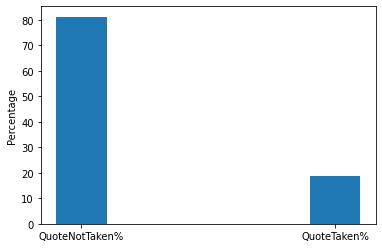

In [118]:
quoteNotTakenCount = df.QuoteNumber[df['QuoteConversion_Flag']==0].count()
quoteTakenCount = df.QuoteNumber[df['QuoteConversion_Flag']==1].count()
totalCount = df['QuoteNumber'].count()

quoteNotTakenPercent = round((quoteNotTakenCount/totalCount)*100,2)
quoteTakenPercent = round((quoteTakenCount/totalCount)*100,2)

print("Quote Not taken: {0}%\nQuote taken: {1}%".format(quoteNotTakenPercent, quoteTakenPercent))

x_axis = ("QuoteNotTaken%", "QuoteTaken%")
x_pos = np.arange(len(x_axis))

height = [quoteNotTakenPercent, quoteTakenPercent]
plt.bar(x_pos, height, width = 0.2)
plt.xticks(x_pos, x_axis)
plt.ylabel('Percentage')
plt.show()



---



**9. Count Plot between State and Quote_Conversion_Flag.**

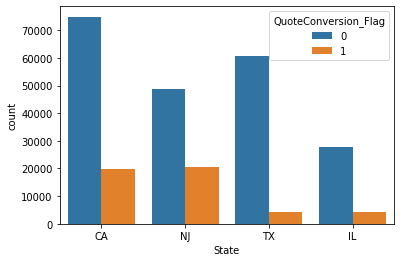

In [119]:
sns.countplot(x='State', hue = 'QuoteConversion_Flag', data = df)
plt.show()



---



**10. Plot for new Features Month, Year and Is_Weekend.**

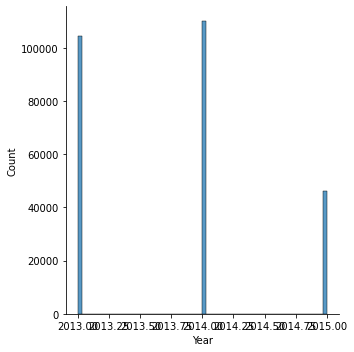

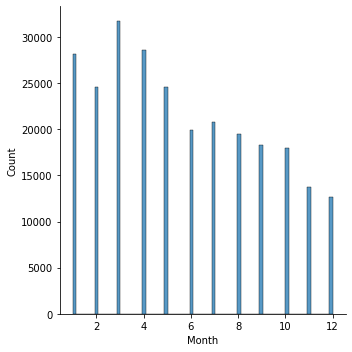

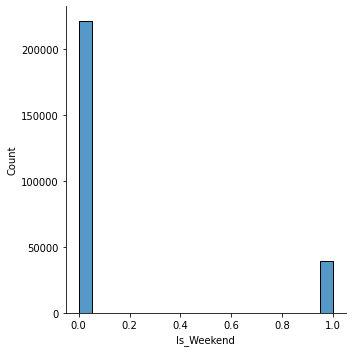

In [120]:
#plt.subplot(1,3,1)
sns.displot(df['Year'])

#plt.subplot(1,3,2)
sns.displot(df['Month'])

#plt.subplot(1,3,3)
sns.displot(df['Is_Weekend'])

plt.show()



---



**11. BMI vs QuoteConversion_Flag**

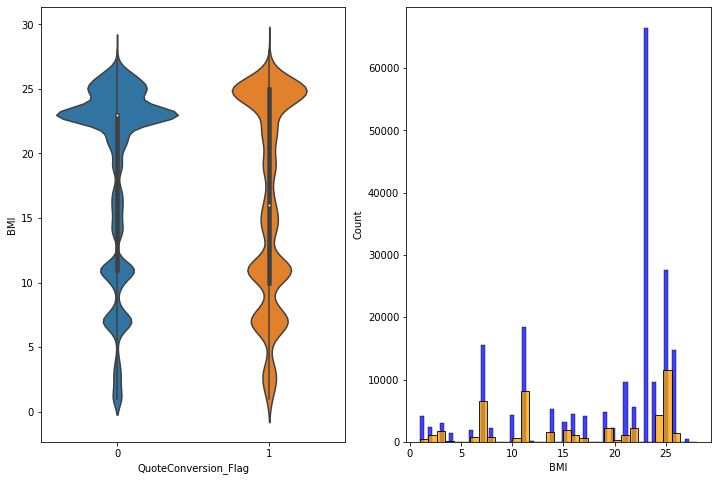

In [121]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'QuoteConversion_Flag', y = 'BMI', data = df[0:])

plt.subplot(1,2,2)
sns.histplot(df[df['QuoteConversion_Flag'] == 0]['BMI'][0:] , label = "0", color = 'blue')
sns.histplot(df[df['QuoteConversion_Flag'] == 1]['BMI'][0:] , label = "1" , color = 'orange')

plt.show()



---



**12. Plot between State and mean BMI for Quote_0 and Quote_1.**

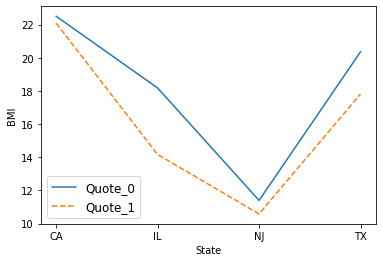

In [169]:
q0 = df[df.QuoteConversion_Flag == 0].groupby('State').mean().BMI
q1 = df[df.QuoteConversion_Flag == 1].groupby('State').mean().BMI

plt.plot(q0.index, q0.values, label = 'Quote_0', linestyle = '-')
plt.plot(q1.index, q1.values, label = 'Quote_1', linestyle = '--')

plt.xlabel('State')
plt.ylabel('BMI')
plt.legend(fontsize = 12)
plt.show()



---



**13. Implementing AUC metric from scratch in Python using Numpy/Pandas/Scipy only.**

  **The "df_for_roc_calc" will have Actual_Y, Probability_of_Y_At_0, Probability_of_Y_At_1 which came from Logistic Regression model (just to make sure the working of AUC metric).**

In [187]:
df_for_roc_calc['y_tst'] = y_tst.values

df_for_roc_calc

,prob_of_y_0,prob_of_y_1,y_tst
0,77.0,23.0,0
1,60.0,40.0,1
2,85.0,15.0,0
3,77.0,23.0,1
4,93.0,7.0,0
...,...,...,...
78221,95.0,5.0,0
78222,90.0,10.0,0
78223,83.0,17.0,0
78224,73.0,27.0,0




---



**14. df_to_calc_threshold_sort_desc will now have the "Actual_Y" and the corresponding Yi's probability in the descending order of Probabilities.**

In [188]:
# Create a new DataFrame which holds the Actual_Ys and the Predicted Probabilities.
df_to_calc_threshold=pd.DataFrame(columns=['Actual_Y', 'Predicted_Prob'])

# Loop through each record in df_for_roc_calc and store the Actual_Ys and the corresponsing Yi's probability in the descending order of probabilities.
for i in df_for_roc_calc.index:
  # If the Actual_Y is 0, then get the probability of Y_0's
  if df_for_roc_calc['y_tst'][i] == 0:
    df_to_calc_threshold = df_to_calc_threshold.append(pd.DataFrame({'Actual_Y' : df_for_roc_calc['y_tst'][i], 'Predicted_Prob' : df_for_roc_calc['prob_of_y_0'][i]}, index=[0]), ignore_index = True)
  # Else get the probability of Y_1's
  else:
    df_to_calc_threshold = df_to_calc_threshold.append(pd.DataFrame({'Actual_Y' : df_for_roc_calc['y_tst'][i], 'Predicted_Prob' : df_for_roc_calc['prob_of_y_1'][i]}, index=[0]), ignore_index = True)

# Sort in descending order of the probabilities and store in df_to_calc_threshold_sort_desc.
df_to_calc_threshold_sort_desc = df_to_calc_threshold.sort_values('Predicted_Prob', ascending=False)
df_to_calc_threshold_sort_desc

,Actual_Y,Predicted_Prob
40904,0,99.0
66854,0,99.0
12058,0,99.0
18768,0,99.0
66863,0,99.0
...,...,...
48918,1,2.0
51610,1,2.0
7403,1,2.0
31052,1,1.0




---



**15. Calculate Y Thresholds from the probabilities.**

In [190]:
# Create a dataframe called y_all_Ts which contains Actual_Y's and the Threshold Y's.
y_all_Ts = pd.DataFrame()

# thres_lst is the sample threshold limits
thres_lst = [99, 97, 95, 93, 91]

# Function that calculates the Threshold Y's which takes the Predicted Probabilities and the Threshold list as input.
def calc_predict_from_threshold(pred_prob, threshold_set):
  y_all_Ts['Act_Y'] = pred_prob['Actual_Y']
  # Loop through the Thresholds given
  for no_of_thres in range(1,len(threshold_set)+1):
    # Dynamically renaming the y_T like y_T1, y_T2, etc., according to the given Threshold list.
    y_T = 'y_T'+str(no_of_thres)
    y_T=[]
    # Loop through each probabilities and check if the predicted probability is greater than or equal to the Threshold probability set.
    # Append 1 if greater else 0 to the y_Ti.
    for i in pred_prob.index:
      if (np.greater_equal(int(pred_prob['Predicted_Prob'][i]), int(threshold_set[no_of_thres-1]))):
        y_T.append(1)
      else:
        y_T.append(0)
    # y_t_name is the column name like y_Ti which will be added to the main DataFrame y_all_Ts
    y_t_name = 'y_T'+str(no_of_thres)
    y_t_df = pd.DataFrame(y_T, columns = ['y_T'+str(no_of_thres)])
    y_all_Ts[y_t_name] = y_t_df[y_t_name].values

calc_predict_from_threshold(df_to_calc_threshold_sort_desc, thres_lst)
print(y_all_Ts)

      Act_Y  y_T1  y_T2  y_T3  y_T4  y_T5
40904     0     1     1     1     1     1
66854     0     1     1     1     1     1
12058     0     1     1     1     1     1
18768     0     1     1     1     1     1
66863     0     1     1     1     1     1
...     ...   ...   ...   ...   ...   ...
48918     1     0     0     0     0     0
51610     1     0     0     0     0     0
7403      1     0     0     0     0     0
31052     1     0     0     0     0     0
66257     1     0     0     0     0     0

[78226 rows x 6 columns]




---



**16. Calculate TPR for each Predicted Thresholds.**

In [191]:
tpr_roc=[]
def calc_tpr(actual_pred_ys):
  # no_of_columns_except_act - to get the no. of thresholds in the main DataFrame y_all_Ts except the Actual Ys
  no_of_columns_except_act = y_all_Ts.shape[1]-1

  # Loop through each of the predicted Threshold values.
  for i in range(1, no_of_columns_except_act+1):
    
    # Start of dynamically create the column names for each TPR value.
    col_name = 'y_T'+str(i)
    tp = 'tp'+str(i)
    fn = 'fn'+str(i)
    p = 'p'+str(i)
    tpr = 'tpr'+str(i)
    # End of dynamically create the column names for each TPR value.

    tp = actual_pred_ys[col_name][actual_pred_ys[col_name]==1].count() + actual_pred_ys.Act_Y[actual_pred_ys['Act_Y']==1].count()
    fn = actual_pred_ys[col_name][actual_pred_ys[col_name]==0].count() + actual_pred_ys.Act_Y[actual_pred_ys['Act_Y']==1].count()

    p = tp + fn
    tpr = (tp/p)

    # Append all TPR values to the main TPR list tpr_roc
    tpr_roc.append(round(tpr,3))

calc_tpr(y_all_Ts)

print(tpr_roc)

[0.141, 0.196, 0.251, 0.297, 0.336]




---



**17. Calculate FPR for each Predicted Thresholds.**

In [192]:
fpr_roc=[]
def calc_fpr(actual_pred_ys):
  # no_of_columns_except_act - to get the no. of thresholds in the main DataFrame y_all_Ts except the Actual Ys
  no_of_columns_except_act = y_all_Ts.shape[1]-1

  # Loop through each of the predicted Threshold values.
  for i in range(1, no_of_columns_except_act+1):

    # Start of dynamically create the column names for each FPR value.
    col_name = 'y_T'+str(i)
    fp = 'fp'+str(i)
    tn = 'tn'+str(i)
    n = 'n'+str(i)
    fpr = 'fpr'+str(i)
    # End of dynamically create the column names for each FPR value.

    fp = actual_pred_ys[col_name][actual_pred_ys[col_name]==1].count() + actual_pred_ys.Act_Y[actual_pred_ys['Act_Y']==0].count()
    tn = actual_pred_ys[col_name][actual_pred_ys[col_name]==0].count() + actual_pred_ys.Act_Y[actual_pred_ys['Act_Y']==0].count()

    n = tn + fp
    fpr = (fp/n)

    # Append all FPR values to the main FPR list fpr_roc
    fpr_roc.append(round(fpr,3))

calc_fpr(y_all_Ts)

print(fpr_roc)

[0.312, 0.341, 0.37, 0.394, 0.414]




---



**18. Calculate ROC using the calculated TPR and FPR values.**

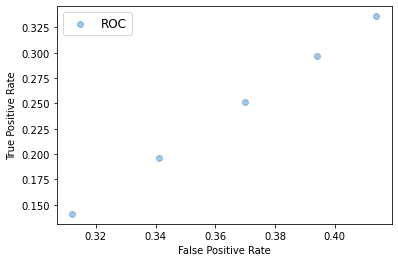

In [193]:
plt.scatter(fpr_roc, tpr_roc, alpha = 0.4, label = 'ROC')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(fontsize = 12)

plt.show()